In [1]:
import numpy as np
import matplotlib.pyplot as plt

from BoltzmannValueIteration import BoltzmannValueIteration
from SetupDeterministicTransition import *
from SetupRewardTable import *
from GoalInferenceVisualizations import *
from GoalInferenceSolution import *

## Plotting Posteriors

In [2]:
def plotPosteriors(posteriors, title="", labels=['A', 'B', 'C']):
    
    x = range(len(posteriors[:, 0]))
    plt.title(title)
    plt.plot(x, posteriors[:,0])
    plt.plot(x, posteriors[:,1])
    plt.plot(x, posteriors[:,2])

    plt.legend(labels)
    plt.show()

# Environment Parameters

In [3]:
gridWidth = 7
gridHeight = 6
allActions = [(1,0), (0,1), (-1,0), (0,-1), (-1,1), (1,-1), (1,1), (-1,-1)]
trapStates = [(3,0), (3,1), (3,2), (3,3)]

In [4]:
#Inputs
gamma = .95
beta = .4
convergenceThreshold = 10e-7
transition = {(0, 0): {(1, 0): {(1, 0): 1},(0, 1): {(0, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(0, 0): 1},(-1, 1): {(0, 0): 1},(1, -1): {(0, 0): 1},(1, 1): {(1, 1): 1},(-1, -1): {(0, 0): 1}},(0, 1): {(1, 0): {(1, 1): 1},(0, 1): {(0, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(0, 0): 1},(-1, 1): {(0, 1): 1},(1, -1): {(1, 0): 1},(1, 1): {(1, 2): 1},(-1, -1): {(0, 1): 1}},(0, 2): {(1, 0): {(1, 2): 1},(0, 1): {(0, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(0, 1): 1},(-1, 1): {(0, 2): 1},(1, -1): {(1, 1): 1},(1, 1): {(1, 3): 1},(-1, -1): {(0, 2): 1}},(0, 3): {(1, 0): {(1, 3): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(0, 2): 1},(-1, 1): {(0, 3): 1},(1, -1): {(1, 2): 1},(1, 1): {(1, 4): 1},(-1, -1): {(0, 3): 1}},(0, 4): {(1, 0): {(1, 4): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(0, 3): 1},(-1, 1): {(0, 4): 1},(1, -1): {(1, 3): 1},(1, 1): {(1, 5): 1},(-1, -1): {(0, 4): 1}},(0, 5): {(1, 0): {(1, 5): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(0, 4): 1},(-1, 1): {(0, 5): 1},(1, -1): {(1, 4): 1},(1, 1): {(0, 5): 1},(-1, -1): {(0, 5): 1}},(1, 0): {(1, 0): {(2, 0): 1},(0, 1): {(1, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(1, 0): 1},(-1, 1): {(0, 1): 1},(1, -1): {(1, 0): 1},(1, 1): {(2, 1): 1},(-1, -1): {(1, 0): 1}},(1, 1): {(1, 0): {(2, 1): 1},(0, 1): {(1, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(1, 0): 1},(-1, 1): {(0, 2): 1},(1, -1): {(2, 0): 1},(1, 1): {(2, 2): 1},(-1, -1): {(0, 0): 1}},(1, 2): {(1, 0): {(2, 2): 1},(0, 1): {(1, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(1, 1): 1},(-1, 1): {(0, 3): 1},(1, -1): {(2, 1): 1},(1, 1): {(2, 3): 1},(-1, -1): {(0, 1): 1}},(1, 3): {(1, 0): {(2, 3): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(1, 2): 1},(-1, 1): {(0, 4): 1},(1, -1): {(2, 2): 1},(1, 1): {(2, 4): 1},(-1, -1): {(0, 2): 1}},(1, 4): {(1, 0): {(2, 4): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(1, 3): 1},(-1, 1): {(0, 5): 1},(1, -1): {(2, 3): 1},(1, 1): {(2, 5): 1},(-1, -1): {(0, 3): 1}},(1, 5): {(1, 0): {(2, 5): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(1, 4): 1},(-1, 1): {(1, 5): 1},(1, -1): {(2, 4): 1},(1, 1): {(1, 5): 1},(-1, -1): {(0, 4): 1}},(2, 0): {(1, 0): {(3, 0): 1},(0, 1): {(2, 1): 1},(-1, 0): {(1, 0): 1},(0, -1): {(2, 0): 1},(-1, 1): {(1, 1): 1},(1, -1): {(2, 0): 1},(1, 1): {(3, 1): 1},(-1, -1): {(2, 0): 1}},(2, 1): {(1, 0): {(3, 1): 1},(0, 1): {(2, 2): 1},(-1, 0): {(1, 1): 1},(0, -1): {(2, 0): 1},(-1, 1): {(1, 2): 1},(1, -1): {(3, 0): 1},(1, 1): {(3, 2): 1},(-1, -1): {(1, 0): 1}},(2, 2): {(1, 0): {(3, 2): 1},(0, 1): {(2, 3): 1},(-1, 0): {(1, 2): 1},(0, -1): {(2, 1): 1},(-1, 1): {(1, 3): 1},(1, -1): {(3, 1): 1},(1, 1): {(3, 3): 1},(-1, -1): {(1, 1): 1}},(2, 3): {(1, 0): {(3, 3): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 3): 1},(0, -1): {(2, 2): 1},(-1, 1): {(1, 4): 1},(1, -1): {(3, 2): 1},(1, 1): {(3, 4): 1},(-1, -1): {(1, 2): 1}},(2, 4): {(1, 0): {(3, 4): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 4): 1},(0, -1): {(2, 3): 1},(-1, 1): {(1, 5): 1},(1, -1): {(3, 3): 1},(1, 1): {(3, 5): 1},(-1, -1): {(1, 3): 1}},(2, 5): {(1, 0): {(3, 5): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 5): 1},(0, -1): {(2, 4): 1},(-1, 1): {(2, 5): 1},(1, -1): {(3, 4): 1},(1, 1): {(2, 5): 1},(-1, -1): {(1, 4): 1}},(3, 0): {(1, 0): {(4, 0): 1},(0, 1): {(3, 1): 1},(-1, 0): {(2, 0): 1},(0, -1): {(3, 0): 1},(-1, 1): {(2, 1): 1},(1, -1): {(3, 0): 1},(1, 1): {(4, 1): 1},(-1, -1): {(3, 0): 1}},(3, 1): {(1, 0): {(4, 1): 1},(0, 1): {(3, 2): 1},(-1, 0): {(2, 1): 1},(0, -1): {(3, 0): 1},(-1, 1): {(2, 2): 1},(1, -1): {(4, 0): 1},(1, 1): {(4, 2): 1},(-1, -1): {(2, 0): 1}},(3, 2): {(1, 0): {(4, 2): 1},(0, 1): {(3, 3): 1},(-1, 0): {(2, 2): 1},(0, -1): {(3, 1): 1},(-1, 1): {(2, 3): 1},(1, -1): {(4, 1): 1},(1, 1): {(4, 3): 1},(-1, -1): {(2, 1): 1}},(3, 3): {(1, 0): {(4, 3): 1},(0, 1): {(3, 4): 1},(-1, 0): {(2, 3): 1},(0, -1): {(3, 2): 1},(-1, 1): {(2, 4): 1},(1, -1): {(4, 2): 1},(1, 1): {(4, 4): 1},(-1, -1): {(2, 2): 1}},(3, 4): {(1, 0): {(4, 4): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 4): 1},(0, -1): {(3, 3): 1},(-1, 1): {(2, 5): 1},(1, -1): {(4, 3): 1},(1, 1): {(4, 5): 1},(-1, -1): {(2, 3): 1}},(3, 5): {(1, 0): {(4, 5): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 5): 1},(0, -1): {(3, 4): 1},(-1, 1): {(3, 5): 1},(1, -1): {(4, 4): 1},(1, 1): {(3, 5): 1},(-1, -1): {(2, 4): 1}},(4, 0): {(1, 0): {(5, 0): 1},(0, 1): {(4, 1): 1},(-1, 0): {(3, 0): 1},(0, -1): {(4, 0): 1},(-1, 1): {(3, 1): 1},(1, -1): {(4, 0): 1},(1, 1): {(5, 1): 1},(-1, -1): {(4, 0): 1}},(4, 1): {(1, 0): {(5, 1): 1},(0, 1): {(4, 2): 1},(-1, 0): {(3, 1): 1},(0, -1): {(4, 0): 1},(-1, 1): {(3, 2): 1},(1, -1): {(5, 0): 1},(1, 1): {(5, 2): 1},(-1, -1): {(3, 0): 1}},(4, 2): {(1, 0): {(5, 2): 1},(0, 1): {(4, 3): 1},(-1, 0): {(3, 2): 1},(0, -1): {(4, 1): 1},(-1, 1): {(3, 3): 1},(1, -1): {(5, 1): 1},(1, 1): {(5, 3): 1},(-1, -1): {(3, 1): 1}},(4, 3): {(1, 0): {(5, 3): 1},(0, 1): {(4, 4): 1},(-1, 0): {(3, 3): 1},(0, -1): {(4, 2): 1},(-1, 1): {(3, 4): 1},(1, -1): {(5, 2): 1},(1, 1): {(5, 4): 1},(-1, -1): {(3, 2): 1}},(4, 4): {(1, 0): {(5, 4): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 4): 1},(0, -1): {(4, 3): 1},(-1, 1): {(3, 5): 1},(1, -1): {(5, 3): 1},(1, 1): {(5, 5): 1},(-1, -1): {(3, 3): 1}},(4, 5): {(1, 0): {(5, 5): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 5): 1},(0, -1): {(4, 4): 1},(-1, 1): {(4, 5): 1},(1, -1): {(5, 4): 1},(1, 1): {(4, 5): 1},(-1, -1): {(3, 4): 1}},(5, 0): {(1, 0): {(6, 0): 1},(0, 1): {(5, 1): 1},(-1, 0): {(4, 0): 1},(0, -1): {(5, 0): 1},(-1, 1): {(4, 1): 1},(1, -1): {(5, 0): 1},(1, 1): {(6, 1): 1},(-1, -1): {(5, 0): 1}},(5, 1): {(1, 0): {(6, 1): 1},(0, 1): {(5, 2): 1},(-1, 0): {(4, 1): 1},(0, -1): {(5, 0): 1},(-1, 1): {(4, 2): 1},(1, -1): {(6, 0): 1},(1, 1): {(6, 2): 1},(-1, -1): {(4, 0): 1}},(5, 2): {(1, 0): {(6, 2): 1},(0, 1): {(5, 3): 1},(-1, 0): {(4, 2): 1},(0, -1): {(5, 1): 1},(-1, 1): {(4, 3): 1},(1, -1): {(6, 1): 1},(1, 1): {(6, 3): 1},(-1, -1): {(4, 1): 1}},(5, 3): {(1, 0): {(6, 3): 1},(0, 1): {(5, 4): 1},(-1, 0): {(4, 3): 1},(0, -1): {(5, 2): 1},(-1, 1): {(4, 4): 1},(1, -1): {(6, 2): 1},(1, 1): {(6, 4): 1},(-1, -1): {(4, 2): 1}},(5, 4): {(1, 0): {(6, 4): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 4): 1},(0, -1): {(5, 3): 1},(-1, 1): {(4, 5): 1},(1, -1): {(6, 3): 1},(1, 1): {(6, 5): 1},(-1, -1): {(4, 3): 1}},(5, 5): {(1, 0): {(6, 5): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 5): 1},(0, -1): {(5, 4): 1},(-1, 1): {(5, 5): 1},(1, -1): {(6, 4): 1},(1, 1): {(5, 5): 1},(-1, -1): {(4, 4): 1}},(6, 0): {(1, 0): {(6, 0): 1},(0, 1): {(6, 1): 1},(-1, 0): {(5, 0): 1},(0, -1): {(6, 0): 1},(-1, 1): {(5, 1): 1},(1, -1): {(6, 0): 1},(1, 1): {(6, 0): 1},(-1, -1): {(6, 0): 1}},(6, 1): {(1, 0): {(6, 1): 1},(0, 1): {(6, 2): 1},(-1, 0): {(5, 1): 1},(0, -1): {(6, 0): 1},(-1, 1): {(5, 2): 1},(1, -1): {(6, 1): 1},(1, 1): {(6, 1): 1},(-1, -1): {(5, 0): 1}},(6, 2): {(1, 0): {(6, 2): 1},(0, 1): {(6, 3): 1},(-1, 0): {(5, 2): 1},(0, -1): {(6, 1): 1},(-1, 1): {(5, 3): 1},(1, -1): {(6, 2): 1},(1, 1): {(6, 2): 1},(-1, -1): {(5, 1): 1}},(6, 3): {(1, 0): {(6, 3): 1},(0, 1): {(6, 4): 1},(-1, 0): {(5, 3): 1},(0, -1): {(6, 2): 1},(-1, 1): {(5, 4): 1},(1, -1): {(6, 3): 1},(1, 1): {(6, 3): 1},(-1, -1): {(5, 2): 1}},(6, 4): {(1, 0): {(6, 4): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 4): 1},(0, -1): {(6, 3): 1},(-1, 1): {(5, 5): 1},(1, -1): {(6, 4): 1},(1, 1): {(6, 4): 1},(-1, -1): {(5, 3): 1}},(6, 5): {(1, 0): {(6, 5): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 5): 1},(0, -1): {(6, 4): 1},(-1, 1): {(6, 5): 1},(1, -1): {(6, 5): 1},(1, 1): {(6, 5): 1},(-1, -1): {(5, 4): 1}}}

#Observed Trajectories
trajectoryToGoalA = [(0,0), (1,1), (1,2), (2,3), (3,4), (4,4), (5,4), (6,4)]
trajectoryToGoalB = [(0,0), (1,1), (2,2), (2,3), (3,4), (4,3), (5,2), (6,1)]
trajectoryToGoalC = [(0,0), (0,1), (1,2), (1,3), (1,4), (1,5)]

## Environment 1

In [5]:
#Environment 1: Solid  Barrier
rewardA = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): 10},(-1, 0): {(5, 4): 10},(0, -1): {(6, 3): 10},(-1, 1): {(5, 5): 10},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): 10}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
rewardB = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): 10},(-1, 0): {(5, 1): 10},(0, -1): {(6, 0): 10},(-1, 1): {(5, 2): 10},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): 10}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
rewardC = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): 10},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): 10},(0, -1): {(1, 4): 10},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): 10},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): 10}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}

Policies for each goal in environment 1

In [6]:
valueA = {state:0 for state in rewardA.keys()}
goalStateA = (6,4)
getPolicyA = BoltzmannValueIteration(transition, rewardA, valueA, convergenceThreshold, gamma, beta)
optimalValuesA, policyA = getPolicyA()

valueB = {state:0 for state in rewardB.keys()}
goalStateB = (6,1)
getPolicyB = BoltzmannValueIteration(transition, rewardB, valueB, convergenceThreshold, gamma, beta)
optimalValuesB, policyB = getPolicyB()

valueC = {state:0 for state in rewardC.keys()}
goalStateC = (1,5)
getPolicyC = BoltzmannValueIteration(transition, rewardC, valueC, convergenceThreshold, gamma, beta)
optimalValuesC, policyC = getPolicyC()

In [7]:
environment1Policies = [policyA, policyB, policyC]
environment1Priors = [1/3, 1/3, 1/3]

## Goal Inference Trajectory A

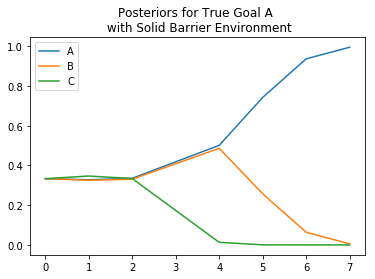

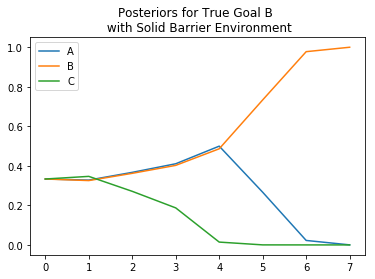

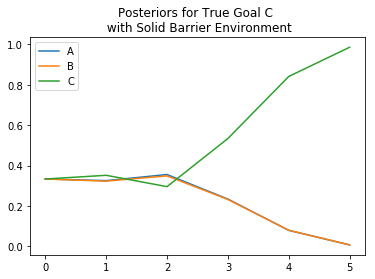

In [8]:
inferGoalA = PerformGoalInference(transition, environment1Policies, environment1Priors, trajectoryToGoalA)
posteriorsToGoalA = inferGoalA()
plotPosteriors(posteriorsToGoalA, "Posteriors for True Goal A \n with Solid Barrier Environment")

inferGoalB = PerformGoalInference(transition, environment1Policies, environment1Priors, trajectoryToGoalB)
posteriorsToGoalB = inferGoalB()
plotPosteriors(posteriorsToGoalB,"Posteriors for True Goal B \n with Solid Barrier Environment")

inferGoalC = PerformGoalInference(transition, environment1Policies, environment1Priors, trajectoryToGoalC)
posteriorsToGoalC = inferGoalC()
plotPosteriors(posteriorsToGoalC,"Posteriors for True Goal C \n with Solid Barrier Environment")

# Environment 2

In [9]:
#Environment 2: Barrier with a Gap
rewardAGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): 10},(-1, 0): {(5, 4): 10},(0, -1): {(6, 3): 10},(-1, 1): {(5, 5): 10},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): 10}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
rewardBGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): 10},(-1, 0): {(5, 1): 10},(0, -1): {(6, 0): 10},(-1, 1): {(5, 2): 10},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): 10}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
rewardCGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): 10},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): 10},(0, -1): {(1, 4): 10},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): 10},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): 10}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}

## Value and Policy

In [10]:
valueAGap = {state:0 for state in rewardAGap.keys()}
goalStateAGap = (6,4)
getPolicyAGap = BoltzmannValueIteration(transition, rewardAGap, valueAGap, convergenceThreshold, gamma, beta)
optimalValuesAGap, policyAGap = getPolicyAGap()

valueBGap = {state:0 for state in rewardBGap.keys()}
goalStateBGap = (6,1)
getPolicyBGap = BoltzmannValueIteration(transition, rewardBGap, valueBGap, convergenceThreshold, gamma, beta)
optimalValuesBGap, policyBGap= getPolicyBGap()

valueCGap = {state:0 for state in rewardCGap.keys()}
goalStateCGap = (6,1)
getPolicyCGap = BoltzmannValueIteration(transition, rewardCGap, valueCGap, convergenceThreshold, gamma, beta)
optimalValuesCGap, policyCGap= getPolicyCGap()

In [11]:
environment2Policies = [policyAGap, policyBGap, policyCGap]
environment2Priors = [1/3, 1/3, 1/3]

## Goal Inference Trajectory to A

In [15]:
posteriorsToGoalAGap

array([[3.33333333e-01, 3.33333333e-01, 3.33333333e-01],
       [3.29095039e-01, 3.31607361e-01, 3.39297600e-01],
       [1.39576834e-01, 1.09729662e-01, 7.50693504e-01],
       [1.75857786e-01, 7.66349132e-02, 7.47507300e-01],
       [5.99457752e-01, 2.31058228e-01, 1.69484020e-01],
       [8.74177554e-01, 1.20406211e-01, 5.41623439e-03],
       [9.73553850e-01, 2.62833717e-02, 1.62778126e-04],
       [9.97878543e-01, 2.11927860e-03, 2.17845009e-06]])

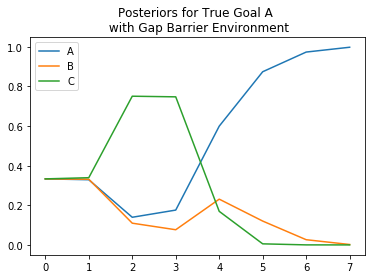

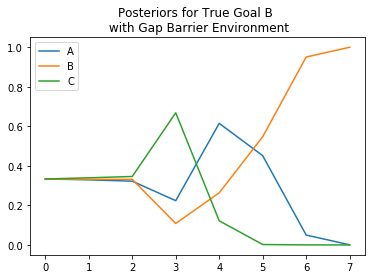

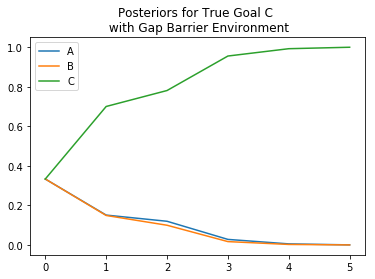

In [12]:
inferGoalAGap = PerformGoalInference(transition, environment2Policies, environment2Priors, trajectoryToGoalA)
posteriorsToGoalAGap = inferGoalAGap()
plotPosteriors(posteriorsToGoalAGap,  "Posteriors for True Goal A \n with Gap Barrier Environment")

inferGoalBGap = PerformGoalInference(transition, environment2Policies, environment2Priors, trajectoryToGoalB)
posteriorsToGoalBGap = inferGoalBGap()
plotPosteriors(posteriorsToGoalBGap, "Posteriors for True Goal B \n with Gap Barrier Environment")

inferGoalCGap = PerformGoalInference(transition, environment2Policies, environment2Priors, trajectoryToGoalC)
posteriorsToGoalCGap = inferGoalCGap()
plotPosteriors(posteriorsToGoalCGap, "Posteriors for True Goal C \n with Gap Barrier Environment")

## Value and Policy Visualizations for Environment 1

True Goal in Green

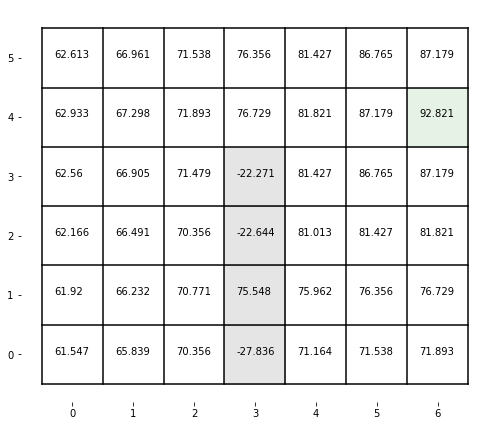

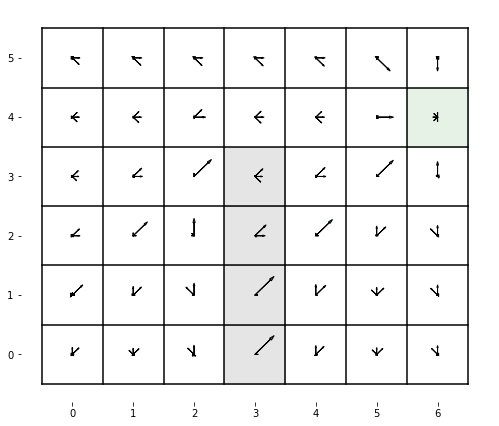

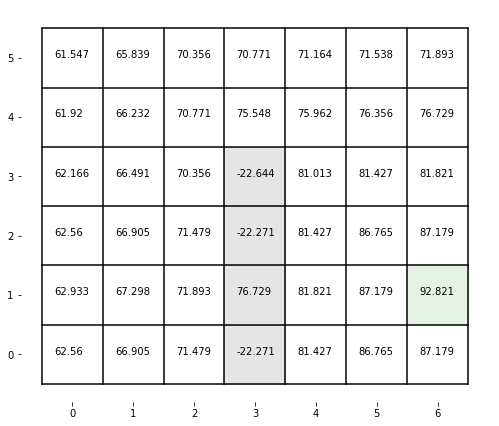

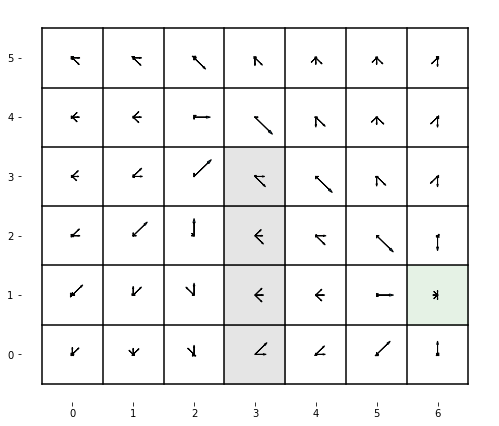

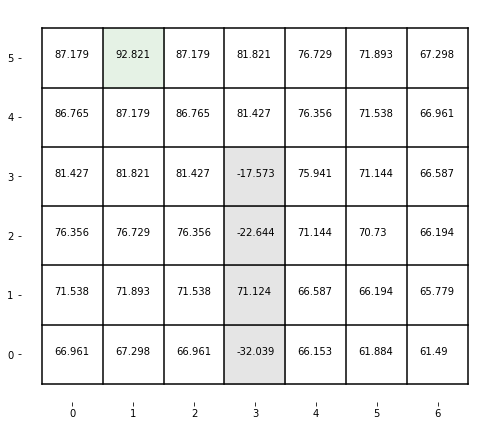

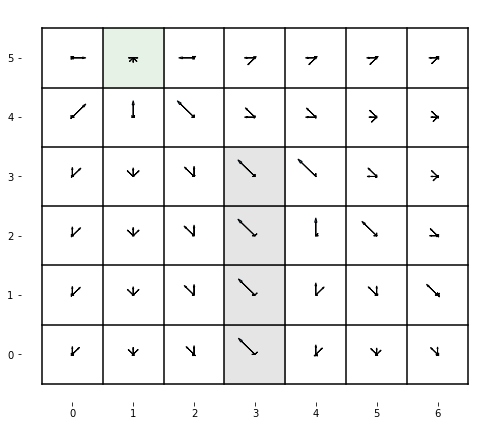

In [13]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateA, trapStates = trapStates, valueTable = optimalValuesAGap)
visualizePolicy(gridWidth, gridHeight, goalStateA, trapStates, policyA)

visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateB, trapStates = trapStates, valueTable = optimalValuesBGap)
visualizePolicy(gridWidth, gridHeight, goalStateB, trapStates, policyB)

visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateC, trapStates = trapStates, valueTable = optimalValuesCGap)
visualizePolicy(gridWidth, gridHeight, goalStateC, trapStates, policyC)

## Value and Policy Visualizations for Environment 2 (with Gap)

True Goal in Green

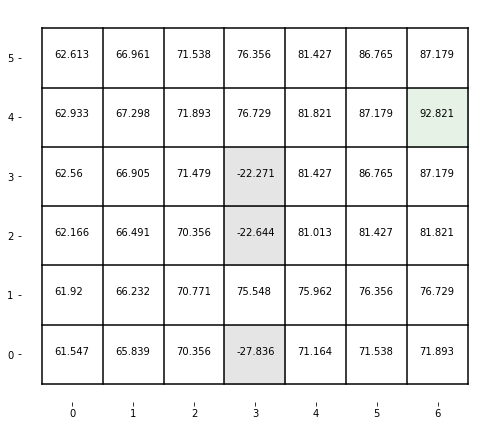

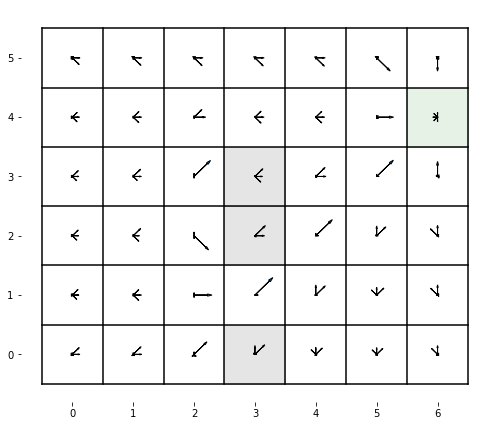

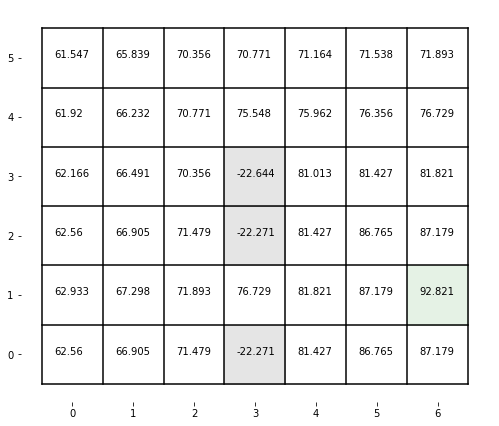

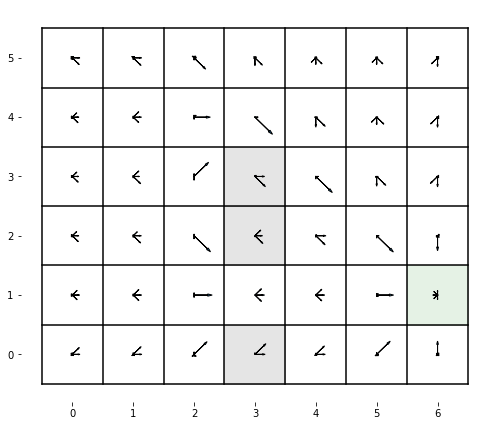

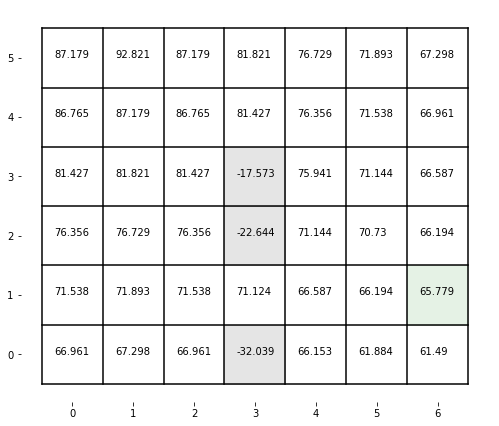

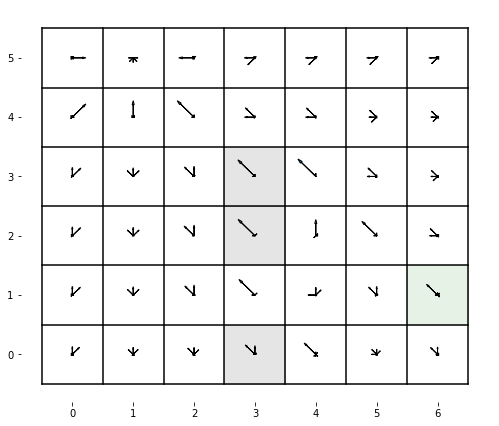

In [14]:
trapStates = [(3,0), (3,2), (3,3)]
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateAGap, trapStates = trapStates, valueTable = optimalValuesAGap)
visualizePolicy(gridWidth, gridHeight, goalStateAGap, trapStates, policyAGap)

visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateBGap, trapStates = trapStates, valueTable = optimalValuesBGap)
visualizePolicy(gridWidth, gridHeight, goalStateBGap, trapStates, policyBGap)

visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateCGap, trapStates = trapStates, valueTable = optimalValuesCGap)
visualizePolicy(gridWidth, gridHeight, goalStateCGap, trapStates, policyCGap)